Using https://github.com/OPERA-Cal-Val/OPERA_coverage

In [1]:
from opera_coverage import get_coverage
from geopandas import gpd
import matplotlib.pyplot as plt
from shapely.geometry import box
import datetime
from tqdm import tqdm
import pandas as pd
import concurrent.futures

# World

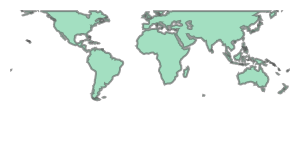

In [2]:
df_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_geo = df_world.geometry.unary_union

global_bbox = box(-180, -60, 180, 60)
world_geo_cropped = world_geo.intersection(global_bbox)
world_geo_cropped

# Get Daily Coverage

In [3]:
sensor_list = ['sentinel2','landsat8_9']
dates = [datetime.datetime(2021, 8, 1) + datetime.timedelta(days=k) for k in range(14)]
date_ranges = [(date, date + datetime.timedelta(days=1)) for date in dates]

In [4]:
def get_coverage_parital(date_range):
    return get_coverage(sensor_list, global_bbox, date_range)

# Check single thread
# dfs = list(map(get_coverage_parital, tqdm(date_ranges[:1])))

In [7]:
with concurrent.futures.ThreadPoolExecutor(max_workers=5) as executor:
    dfs = list(tqdm(executor.map(lambda date_range: get_coverage_parital(date_range), 
                                 date_ranges), total=len(date_ranges)))

100%|██████████| 14/14 [18:06<00:00, 77.60s/it]


<AxesSubplot: >

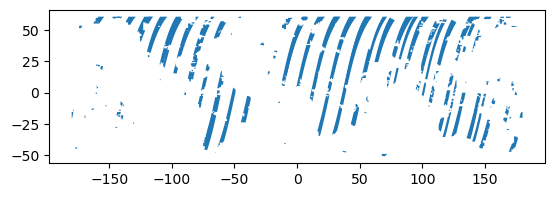

In [8]:
dfs[0].plot()

In [41]:
dfs[0]

,startTime,geometry,sensor,fileID,cadence
0,2021-08-01 07:00:00.894000+00:00,"MULTIPOLYGON (((37.82433 -46.50677, 39.12779 -...",sentinel2,"HLS.S30.T41SKT.2021213T064631.v2.0,HLS.S30.T40...",NaT
1,2021-08-01 07:26:07.025000+00:00,"MULTIPOLYGON (((29.10976 -31.66484, 29.10976 -...",landsat8_9,"HLS.L30.T40VCM.2021213T072607.v2.0,HLS.L30.T40...",0 days 00:26:06.131000
2,2021-08-01 08:00:05.431000+00:00,"MULTIPOLYGON (((17.13094 -32.60750, 17.12991 -...",sentinel2,"HLS.S30.T37MDV.2021213T073619.v2.0,HLS.S30.T37...",0 days 00:33:58.406000
3,2021-08-01 09:00:01.517000+00:00,"MULTIPOLYGON (((11.70731 -5.51054, 11.70728 -5...",sentinel2,"HLS.S30.T34HBG.2021213T082611.v2.0,HLS.S30.T36...",0 days 00:59:56.086000
4,2021-08-01 09:05:00.094000+00:00,"MULTIPOLYGON (((12.59947 3.64597, 12.62556 3.7...",landsat8_9,"HLS.L30.T36VUM.2021213T090500.v2.0,HLS.L30.T36...",0 days 00:04:58.577000
5,2021-08-01 10:13:56.446000+00:00,"MULTIPOLYGON (((-10.17179 -39.98951, -8.88594 ...",sentinel2,"HLS.S30.T34VEM.2021213T101031.v2.0,HLS.S30.T34...",0 days 01:08:56.352000
6,2021-08-01 10:43:53.146000+00:00,"MULTIPOLYGON (((-11.44664 6.82606, -11.44661 6...",landsat8_9,"HLS.L30.T32VML.2021213T104353.v2.0,HLS.L30.T32...",0 days 00:29:56.700000
7,2021-08-01 11:02:36.431000+00:00,"POLYGON ((-14.66623 -8.23036, -14.00329 -8.229...",landsat8_9,HLS.L30.T28MES.2021213T110236.v2.0,0 days 00:18:43.285000
8,2021-08-01 11:04:25.067000+00:00,"MULTIPOLYGON (((-15.00018 -8.23050, -15.00018 ...",sentinel2,"HLS.S30.T32VLM.2021213T105619.v2.0,HLS.S30.T32...",0 days 00:01:48.636000
9,2021-08-01 12:02:29.257000+00:00,"MULTIPOLYGON (((-23.59008 14.40217, -23.59031 ...",sentinel2,"HLS.S30.T28SCB.2021213T120221.v2.0,HLS.S30.T28...",0 days 00:58:04.190000


# Get Cumulative Growth

In [21]:
agg_dict = {'startTime': lambda dates: min(dates).date(),
             'sensor': lambda x: ','.join(sensor_list)}
dfs_dissolved = [df.dissolve(aggfunc=agg_dict) for df in dfs]
df_daily = pd.concat(dfs_dissolved, axis=0)
df_daily.head()

,geometry,startTime,sensor
0,"MULTIPOLYGON (((-177.00025 -44.34147, -177.000...",2021-08-01,"sentinel2,landsat8_9"
0,"MULTIPOLYGON (((-176.89986 -28.92770, -176.899...",2021-08-02,"sentinel2,landsat8_9"
0,"MULTIPOLYGON (((-127.91022 -25.21708, -127.954...",2021-08-03,"sentinel2,landsat8_9"
0,"MULTIPOLYGON (((-176.87941 -43.43013, -175.784...",2021-08-04,"sentinel2,landsat8_9"
0,"MULTIPOLYGON (((-135.63797 -23.59704, -135.393...",2021-08-05,"sentinel2,landsat8_9"


In [22]:
df_daily_cumulative = df_daily.copy()
df_daily_cumulative.geometry = [df_daily.geometry[:k+1].unary_union for k in range(df_daily.shape[0])]

/Users/cmarshak/opt/anaconda3/envs/dswx_val/lib/python3.11/site-packages/geopandas/geoseries.py:622: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  val = getattr(super(), mtd)(*args, **kwargs)


In [25]:
intersection_area = df_daily_cumulative.geometry.intersection(world_geo_cropped).area
df_daily_cumulative['cumulative_percent_coverage'] = intersection_area / world_geo_cropped.area * 100
df_daily_cumulative.head()

/var/folders/s6/fbsc26cd0ddffbp3_knts_9c0wcxj1/T/ipykernel_53755/3290128087.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  intersection_area = df_daily_cumulative.geometry.intersection(world_geo_cropped).area


,geometry,startTime,sensor,cumulative_percent_coverage
0,"MULTIPOLYGON (((-177.00025 -44.34147, -177.000...",2021-08-01,"sentinel2,landsat8_9",29.145055
0,"MULTIPOLYGON (((-177.00025 -44.34147, -177.000...",2021-08-02,"sentinel2,landsat8_9",56.827568
0,"MULTIPOLYGON (((-177.00025 -44.34147, -177.000...",2021-08-03,"sentinel2,landsat8_9",73.667657
0,"MULTIPOLYGON (((-177.00025 -44.34147, -177.000...",2021-08-04,"sentinel2,landsat8_9",89.047623
0,"MULTIPOLYGON (((-177.00025 -44.34147, -177.000...",2021-08-05,"sentinel2,landsat8_9",95.650435


In [26]:
df_daily_cumulative.set_index('startTime')

,geometry,sensor,cumulative_percent_coverage
startTime,,,
2021-08-01,"MULTIPOLYGON (((-177.00025 -44.34147, -177.000...","sentinel2,landsat8_9",29.145055
2021-08-02,"MULTIPOLYGON (((-177.00025 -44.34147, -177.000...","sentinel2,landsat8_9",56.827568
2021-08-03,"MULTIPOLYGON (((-177.00025 -44.34147, -177.000...","sentinel2,landsat8_9",73.667657
2021-08-04,"MULTIPOLYGON (((-177.00025 -44.34147, -177.000...","sentinel2,landsat8_9",89.047623
2021-08-05,"MULTIPOLYGON (((-177.00025 -44.34147, -177.000...","sentinel2,landsat8_9",95.650435
2021-08-06,"MULTIPOLYGON (((-177.01320 -43.35339, -177.000...","sentinel2,landsat8_9",96.982472
2021-08-07,"MULTIPOLYGON (((-177.00025 -43.35334, -177.000...","sentinel2,landsat8_9",97.762467
2021-08-08,"MULTIPOLYGON (((-177.00025 -43.35334, -177.000...","sentinel2,landsat8_9",98.315874
2021-08-09,"MULTIPOLYGON (((-177.02920 -43.39656, -177.013...","sentinel2,landsat8_9",98.994793


/var/folders/s6/fbsc26cd0ddffbp3_knts_9c0wcxj1/T/ipykernel_53755/2819194220.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


Text(0.5, 0, 'Acquisition Day')

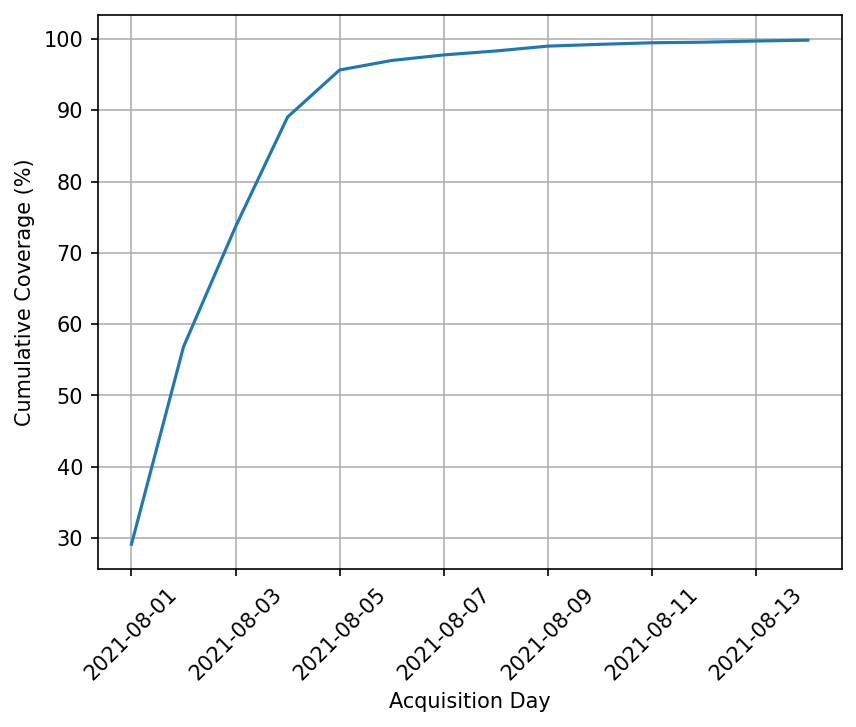

In [39]:
fig, ax = plt.subplots(dpi=150)
df_plot = df_daily_cumulative.set_index('startTime')
df_plot.cumulative_percent_coverage.plot(ax=ax)
ax.grid('on')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_ylabel('Cumulative Coverage (%)')
ax.set_xlabel('Acquisition Day')

In [40]:
df_plot.cumulative_percent_coverage

startTime
2021-08-01    29.145055
2021-08-02    56.827568
2021-08-03    73.667657
2021-08-04    89.047623
2021-08-05    95.650435
2021-08-06    96.982472
2021-08-07    97.762467
2021-08-08    98.315874
2021-08-09    98.994793
2021-08-10    99.248166
2021-08-11    99.466620
2021-08-12    99.550246
2021-08-13    99.710220
2021-08-14    99.830676
Name: cumulative_percent_coverage, dtype: float64